The goal of this notebook is to analyze the data tables created in the previous notebook.

# Imports 

In [1]:
import pandas as pd
import jenkspy

In [126]:
# data
# country tables
countries_df = pd.read_csv("./data/countries_df_combined.csv", index_col=0)
countries_df_groupby = pd.read_csv("./data/countries_df_groupby.csv", index_col=0)
countries_df_groupby['Outside national squad'] = countries_df_groupby['Outside national squad'].astype(int) 
# clubs tabls 
clubs_df = pd.read_csv("./data/clubs_more_than_10_players_df.csv", index_col=0)
clubs_by_country_count_appearences = pd.read_csv("./data/clubs_by_country_count_appearences.csv", index_col=0)

# Countries Data

In [161]:
# Costa Rica qualified 5 of the 7 times, am I missing data?
# Did literally no one in 3 of those tournaments play in Costa Rica?
# https://en.wikipedia.org/wiki/Costa_Rica_at_the_FIFA_World_Cup#2002_FIFA_World_Cup
countries_df[countries_df['Country']=='Costa Rica']

,Country,Players,Outside national squad,Lower tier players,Year
13,Costa Rica,17,0.0,0,2022
89,Costa Rica,20,0.0,0,2006


## Players 

In [127]:
countries_df_groupby = countries_df_groupby.sort_values('Players', ascending=False)

### How many leagues does it take to cover 75% of all players? 

In [129]:
top_5_players = countries_df_outside_national_squad.iloc[0:5]['Players'].sum()
non_top_5_players = countries_df_outside_national_squad.iloc[5:]['Players'].sum()
top_5_players / non_top_5_players

2.21410365335599

In [130]:
percent_covered_individually = [round(100*(countries_df_groupby['Players'][x] / countries_df_groupby['Players'].sum()), 3)
                         for x in range(len(countries_df_groupby))]

In [131]:
def Cumulative(lists):
    cu_list = []
    length = len(lists)
    cu_list = [sum(lists[0:x:1]) for x in range(0, length+1)]
    return cu_list[1:]

In [132]:
cumulative_sums = Cumulative(percent_covered_individually)
cumulative_sums[0:6]

[21.359, 34.444, 47.45, 59.900000000000006, 68.888, 73.302]

<AxesSubplot:>

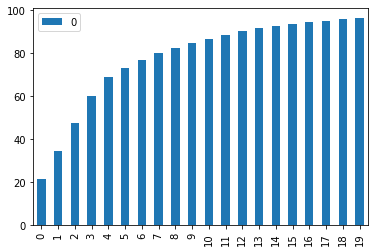

In [175]:
pd.DataFrame(cumulative_sums)[0:20].plot(kind='bar')

## Where lower tiers are in world cup

In [3]:
# countries that have people playing in their lower tiers and in the world cup
countries_lower_tier_players = countries_df_groupby.sort_values('Lower tier players', ascending=False)[0:13]
countries_lower_tier_players.head(10)

,Players,Outside national squad,Lower tier players
Country,,,
England,808,648,54
Germany,495,362,8
Spain,471,341,5
Italy,492,384,3
France,340,279,3
Saudi Arabia,135,21,2
Japan,90,23,2
South Korea,14,0,1
Denmark,8,6,1


## Outside national squad

In [4]:
countries_df_outside_national_squad=countries_df_groupby.sort_values(by='Outside national squad', ascending=False)
countries_df_outside_national_squad.head(10)

,Players,Outside national squad,Lower tier players
Country,,,
England,808,648,54
Italy,492,384,3
Germany,495,362,8
Spain,471,341,5
France,340,279,3
Turkey,67,67,0
Netherlands,121,66,0
Mexico,167,54,1
Portugal,83,49,0


### How many players outside national squad are in top 5 countries 

In [22]:
top_5_outside = countries_df_outside_national_squad.iloc[0:5]['Outside national squad'].sum()
non_top_5_outside = countries_df_outside_national_squad.iloc[5:]['Outside national squad'].sum()
top_5_outside / non_top_5_outside

4.178423236514523

### Foreign to Home Ratio

In [5]:
countries_df_outside_national_squad['foreign_to_home_ratio'] = round(countries_df_outside_national_squad['Outside national squad'] /\
                                                                countries_df_outside_national_squad['Players'], 3)

In [6]:
countries_df_outside_national_squad.sort_values(by="foreign_to_home_ratio", ascending=False).head(10)


,Players,Outside national squad,Lower tier players,foreign_to_home_ratio
Country,,,,
Colombia,1,1,0,1.000
United Arab Emirates,1,1,0,1.000
Austria,4,4,0,1.000
Egypt,2,2,0,1.000
Turkey,67,67,0,1.000
Cyprus,2,2,0,1.000
Hungary,1,1,0,1.000
Scotland,12,12,0,1.000
Kuwait,2,2,0,1.000


## Natural Breaks by Players

In [13]:
breaks = jenkspy.jenks_breaks(countries_df_groupby['Players'], nb_class=2)
countries_df_groupby['cut_jenks_players'] = pd.cut(countries_df_groupby['Players'],
                        bins=breaks,
                        labels=['Star countries', 'Superstar countries'],
                        include_lowest=True)
countries_df_groupby.sort_values(['cut_jenks_players', 'Players'], ascending=False).head(15)

,Players,Outside national squad,Lower tier players,cut_jenks_players
Country,,,,
England,808,648,54,Superstar countries
Germany,495,362,8,Superstar countries
Italy,492,384,3,Superstar countries
Spain,471,341,5,Superstar countries
France,340,279,3,Superstar countries
Mexico,167,54,1,Star countries
Saudi Arabia,135,21,2,Star countries
Netherlands,121,66,0,Star countries
Japan,90,23,2,Star countries


## Ranking the countries (combined leagues)

In [169]:
# multiplied by a negative so we get the ranks in the correct order 
## adding one so that the positions are the rankings (first place gets 1 and not 0)
Sorted_array_players = np.array(countries_df_groupby['Players']*-1).argsort() + 1
Sorted_array_outside = np.array(countries_df_groupby['Outside national squad']*-1).argsort() + 1
# Sorted_array_lower = np.array(countries_df_groupby['Lower tier players']*-1).argsort()

In [172]:
combined_sorted_array = Sorted_array_players + Sorted_array_outside
countries_df_groupby['Combined_rank'] = combined_sorted_array

In [174]:
countries_df_groupby.sort_values(by='Combined_rank')[['Players', 'Outside national squad', 'Combined_rank']][0:10]

,Players,Outside national squad,Combined_rank
Country,,,
England,808,648,2
Germany,495,362,5
Italy,492,384,5
Spain,471,341,8
France,340,279,10
Netherlands,121,66,14
Saudi Arabia,135,21,15
Mexico,167,54,19
Japan,90,23,19


# Clubs 

## Clubs and country

In [116]:
clubs_by_country_count_appearences

,Players_sent,Number_of_times_in_world_cup,cut_jenks
Country,,,
ENG,6,6,6
ESP,4,4,4
FRA,1,1,1
GER,2,2,2
ITA,2,2,2
KSA,1,1,1
NED,1,1,1
QAT,1,1,1


In [8]:
# england has sent 6 teams to the world cup with more than 10 players
clubs_by_country_count_appearences[clubs_by_country_count_appearences['Players_sent'] > 1]

,Players_sent,Number_of_times_in_world_cup,cut_jenks
Country,,,
ENG,6,6,6
ESP,4,4,4
GER,2,2,2
ITA,2,2,2


## Clubs

In [9]:
clubs_df.sort_values(by='Players_sent', ascending=False)

,Players_sent,Number_of_times_in_world_cup,Country,cut_jenks
Barcelona,44,3,ESP,Superstar clubs
Manchester City,42,3,ENG,Superstar clubs
Bayern Munich,41,3,GER,Superstar clubs
Real Madrid,40,3,ESP,Superstar clubs
Manchester United,39,3,ENG,Superstar clubs
Chelsea,35,3,ENG,Superstar clubs
Juventus,34,3,ITA,Superstar clubs
Paris Saint-Germain,33,3,FRA,Superstar clubs
Tottenham Hotspur,23,2,ENG,Star clubs
Arsenal,20,2,ENG,Star clubs


In [11]:
clubs_df[clubs_df['cut_jenks'] == 'Superstar clubs']

,Players_sent,Number_of_times_in_world_cup,Country,cut_jenks
Barcelona,44,3,ESP,Superstar clubs
Bayern Munich,41,3,GER,Superstar clubs
Manchester City,42,3,ENG,Superstar clubs
Manchester United,39,3,ENG,Superstar clubs
Real Madrid,40,3,ESP,Superstar clubs
Chelsea,35,3,ENG,Superstar clubs
Juventus,34,3,ITA,Superstar clubs
Paris Saint-Germain,33,3,FRA,Superstar clubs
